# 量子フーリエ変換

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

In [2]:
number_of_qubit = 4

In [3]:
N=2**number_of_qubit
r = 3
offset = 0

周期とオフセットを設定

In [4]:
psi = np.zeros(N)
for p in range(N):
    if r*p + offset > N-1:
        break
    psi[r*p+offset]=1
print(psi)

[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]


## 量子フーリエ変換行列の作成

In [5]:
## 指数の肩に対応する行列の作成
J_demo=np.arange(4)
K_demo=J_demo
K_demo.reshape(1,-1)*J_demo.reshape(-1,1)

array([[0, 0, 0, 0],
       [0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])

In [6]:
qft = (1/cmath.sqrt(4))*cmath.e**(1j*2*cmath.pi*K_demo.reshape(1,-1)*J_demo.reshape(-1,1)/4)
print(qft)

[[ 5.00000000e-01+0.0000000e+00j  5.00000000e-01+0.0000000e+00j
   5.00000000e-01+0.0000000e+00j  5.00000000e-01+0.0000000e+00j]
 [ 5.00000000e-01+0.0000000e+00j  3.06161700e-17+5.0000000e-01j
  -5.00000000e-01+6.1232340e-17j -9.18485099e-17-5.0000000e-01j]
 [ 5.00000000e-01+0.0000000e+00j -5.00000000e-01+6.1232340e-17j
   5.00000000e-01-1.2246468e-16j -5.00000000e-01+1.8369702e-16j]
 [ 5.00000000e-01+0.0000000e+00j -9.18485099e-17-5.0000000e-01j
  -5.00000000e-01+1.8369702e-16j  2.75545530e-16+5.0000000e-01j]]


In [7]:
J = np.arange(N)
K = J

In [8]:
qft = (1/cmath.sqrt(N))*cmath.e**(1j*2*cmath.pi*K.reshape(1,-1)*J.reshape(-1,1)/N)

## 量子フーリエ変換の実行

In [9]:
psi1 = np.dot(qft,psi)

In [10]:
amplitude = abs(psi1)
amplitude =amplitude**2
sigma = np.sum(amplitude)

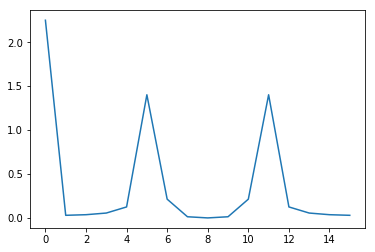

In [11]:
plt.plot(J,amplitude)
plt.show()

周期$r$の量子状態が周期$\frac{N}{r}$の量子状態に変わる

$\frac{N}{r}$が割り切れないところは$\frac{Nk}{r}$に最も近い整数の部分にピークが現れる

In [12]:
index =[]
for p in range(N):
    if (N/r)*p>N-1:
        break
    index.append(int(round((N/r)*p,0)))

$\frac{N}{r}$が割り切れないときは$\frac{Nk}{r}$を四捨五入する

In [13]:
print (index)
print (sigma)

[0, 5, 11]
6.000000000000004


In [14]:
amplitude[index]/sigma

array([0.375     , 0.23360816, 0.23360816])

In [15]:
16/3

5.333333333333333